# Introducción al Webscraping con Selenium

In [18]:
from selenium import webdriver

from selenium.webdriver.common.keys import Keys

from selenium.webdriver.support.wait import WebDriverWait 
from selenium.webdriver.support.select import Select


In [2]:
driver = webdriver.Chrome()

In [4]:
driver.get("https://www.metrocuadrado.com/")

In [21]:
from selenium.webdriver.common.by import By
# Encontramos la flecha para desplegar el menu
tipo_de_inmueble = driver.find_element(By.XPATH, '//*[@id="propertyTypes"]/div[1]/div[2]')
tipo_de_inmueble.click()

In [35]:
opciones_inmuebles = driver.find_elements(By.CLASS_NAME, 'custom-control-description')
[i.text for i in opciones_inmuebles]

['Apartamentos',
 'Casas',
 'Oficinas',
 'Locales',
 'Bodegas',
 'Lotes',
 'Fincas',
 'Edificio de oficinas',
 'Consultorios',
 'Edificio de apartamentos']

In [72]:
from selenium.webdriver.support import expected_conditions as EC

# Encontramos la flecha para desplegar el menu
tipo_de_inmueble = driver.find_element(By.XPATH, '//*[@id="propertyTypes"]/div[1]/div[2]')
tipo_de_inmueble.click()

# Esperar hasta que las opciones sean visibles y luego capturarlas
opciones_inmuebles = WebDriverWait(driver, 10).until(
    EC.presence_of_all_elements_located((By.CLASS_NAME, 'custom-control-description'))
)

[i.text for i in opciones_inmuebles]

['Apartamentos',
 'Casas',
 'Oficinas',
 'Locales',
 'Bodegas',
 'Lotes',
 'Fincas',
 'Edificio de oficinas',
 'Consultorios',
 'Edificio de apartamentos']

In [73]:
# Seleccionar la opción que queremos. En este caso apartamentos
opciones_inmuebles[0].click()

In [91]:
# Encontramos el input text para rellenar
barra_texto = driver.find_element(By.XPATH, '//*[@id="formSearch"]/div/div[1]/div/div[3]/div/div/div/input')
barra_texto.send_keys("Chapinero (Bogotá D.C.)")

In [93]:
boton_buscar = driver.find_element(By.XPATH, '//*[@id="btnSearch"]')
boton_buscar.click()

In [105]:
source = driver.page_source

'<html><head class="at-element-marker"><script type="text/javascript" async="" src="https://www.google-analytics.com/plugins/ua/ec.js"></script><script type="text/javascript" async="" src="https://analytics.tiktok.com/i18n/pixel/static/main.MTIyYzc3NzllMA.js" data-id="CI5IUT3C77U441D0TS2G"></script><script type="text/javascript" async="" charset="utf-8" id="utag_16" src="https://analytics.tiktok.com/i18n/pixel/events.js?sdkid=CI5IUT3C77U441D0TS2G&amp;lib=ttq"></script><script type="text/javascript" async="" charset="utf-8" id="utag_22" src="https://www.googletagmanager.com/gtag/js?id=AW-16466801419"></script><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=AW-16466801419&amp;l=dataLayer&amp;cx=c"></script><script type="text/javascript" async="" charset="utf-8" id="utag_5" src="//static.hotjar.com/c/hotjar-3298791.js?sv=6"></script><script src="https://connect.facebook.net/signals/config/1479130985932468?v=2.9.154&amp;r=stable&amp;domain=www.metro
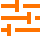
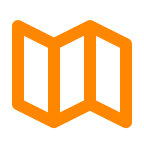
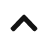
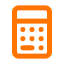
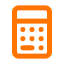
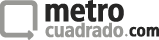
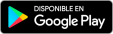
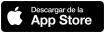
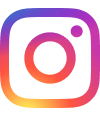

In [106]:
source

<html><head class="at-element-marker"><script async="" src="https://www.google-analytics.com/plugins/ua/ec.js" type="text/javascript"></script><script async="" data-id="CI5IUT3C77U441D0TS2G" src="https://analytics.tiktok.com/i18n/pixel/static/main.MTIyYzc3NzllMA.js" type="text/javascript"></script><script async="" charset="utf-8" id="utag_16" src="https://analytics.tiktok.com/i18n/pixel/events.js?sdkid=CI5IUT3C77U441D0TS2G&amp;lib=ttq" type="text/javascript"></script><script async="" charset="utf-8" id="utag_22" src="https://www.googletagmanager.com/gtag/js?id=AW-16466801419" type="text/javascript"></script><script async="" src="https://www.googletagmanager.com/gtag/js?id=AW-16466801419&amp;l=dataLayer&amp;cx=c" type="text/javascript"></script><script async="" charset="utf-8" id="utag_5" src="//static.hotjar.com/c/hotjar-3298791.js?sv=6" type="text/javascript"></script><script async="" src="https://connect.facebook.net/signals/config/1479130985932468?v=2.9.154&amp;r=stable&amp;domain=w
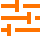
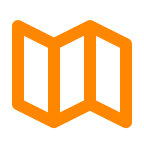
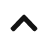
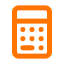
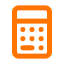
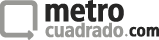
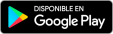
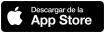
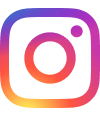

In [107]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(source)
soup

In [135]:
hipervinculos = soup.find_all("a")
hrefs = [i.get("href") for i in hipervinculos if i.get("href")]
proyectos = [i for i in hrefs if "/proyecto/" in i]
proyectos[0]

'/proyecto/view-63/16941-C0012-01'

In [146]:
from seleniumwire import webdriver
driver = webdriver.Chrome()
driver.get("https://www.metrocuadrado.com" + proyectos[0])

In [153]:
link = "https://www.metrocuadrado.com/rest-property-related/related/projectproperties?projectCode=16941-C0012-01"

In [172]:
requests_necesario = [i for i in driver.requests if i.url == link][0]
requests_necesario

Request(method='GET', url='https://www.metrocuadrado.com/rest-property-related/related/projectproperties?projectCode=16941-C0012-01', headers=[('sec-ch-ua', '"Chromium";v="124", "Google Chrome";v="124", "Not-A.Brand";v="99"'), ('accept', 'application/json, text/plain, */*'), ('x-requested-with', 'XMLHttpRequest'), ('sec-ch-ua-mobile', '?0'), ('user-agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36'), ('x-api-key', 'P1MfFHfQMOtL16Zpg36NcntJYCLFm8FqFfudnavl'), ('sec-ch-ua-platform', '"Windows"'), ('sec-fetch-site', 'same-origin'), ('sec-fetch-mode', 'cors'), ('sec-fetch-dest', 'empty'), ('referer', 'https://www.metrocuadrado.com/proyecto/view-63/16941-C0012-01'), ('accept-encoding', 'gzip, deflate, br, zstd'), ('accept-language', 'es-ES,es;q=0.9'), ('priority', 'u=1, i'), ('cookie', 'at_check=true; AMCV_9873253863FFB2BE0A495C51%40AdobeOrg=179643557%7CMCIDTS%7C19836%7CvVersion%7C5.5.0; mbox=session#8ae76eb197fa44e8b874

In [167]:
header_necesario = dict(zip(requests_necesario.headers.keys(), requests_necesario.headers.values()))

In [168]:
import requests

r = requests.get(link, headers = header_necesario)
r.status_code

200

In [173]:
diccionario_resultante = r.json()
diccionario_resultante 

{'properties': [{'imageGallery': [{'id': '16941-C0012-01_1_V1',
     'image': 'https://multimedia.metrocuadrado.com/16941-C0012-01/16941-C0012-01_1_V1_h.jpg'},
    {'id': '16941-C0012-01_2_V1',
     'image': 'https://multimedia.metrocuadrado.com/16941-C0012-01/16941-C0012-01_2_V1_h.jpg'},
    {'id': '16941-C0012-01_3_V1',
     'image': 'https://multimedia.metrocuadrado.com/16941-C0012-01/16941-C0012-01_3_V1_h.jpg'}],
   'contactPhone': '3102162469',
   'whatsapp': None,
   'title': 'Apartamento en Venta, CHAPINERO ALTO , Bogotá D.C.',
   'link': '/proyecto/view-63/16941-C0012-01',
   'imageLink': 'https://multimedia.metrocuadrado.com/16941-C0012-01/16941-C0012-01_1_V1_p.jpg',
   'whatsappMessage': None,
   'badge': 'Proyecto de vivienda',
   'midinmueble': '16941-C0012-01',
   'mtipoinmueble': {'id': '1', 'nombre': 'Apartamento'},
   'mtiponegocio': 'Venta',
   'mvalorventa': 261000000,
   'mvalorarriendo': None,
   'marea': 30.5,
   'mnrocuartos': '1',
   'mnrobanos': '1',
   'mnrogar

In [191]:
diccionario_resultante["properties"][0]['mtiponegocio']
diccionario_resultante["properties"][0]['mvalorventa']
diccionario_resultante["properties"][0]['marea']

30.5